# Trusted zone - Household


In [2]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.precision', 3)


In [3]:
def DBtable_to_df(DB,table): # repated
    """
    Converts the DB `table` in a data frame format 
    """
    con = duckdb.connect(DB)
    df = con.execute(f'SELECT * FROM {table}').df()
    con.close()
    return df

In [4]:

df = DBtable_to_df('../household.duckdb','household')

## Data profiling


In [6]:
df.head()

,section,population,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,...,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors,Year
0,1001.0,568.0,75.0,93.0,52.0,17.0,6.0,5.0,97.0,74.0,...,2.0,36.0,11.0,3.0,0.0,20.0,20.0,0.0,0.0,2020
1,1002.0,492.0,111.0,99.0,32.0,17.0,4.0,1.0,96.0,30.0,...,0.0,33.0,6.0,1.0,0.0,15.0,14.0,0.0,0.0,2020
2,1003.0,862.0,137.0,164.0,68.0,43.0,7.0,2.0,148.0,80.0,...,3.0,50.0,16.0,7.0,0.0,28.0,37.0,0.0,0.0,2020
3,1004.0,600.0,103.0,100.0,55.0,23.0,4.0,0.0,77.0,71.0,...,3.0,48.0,12.0,2.0,1.0,18.0,19.0,2.0,0.0,2020
4,1006.0,888.0,123.0,174.0,82.0,47.0,12.0,1.0,181.0,75.0,...,3.0,57.0,14.0,2.0,1.0,15.0,23.0,0.0,0.0,2020


The enitire dataframe could conatain `float64` type values. However, we are already interested in section and year being string type values, since section is a code and year is the version of the dataset.


In [8]:
df.dtypes


section                                                                    object
population                                                                float64
single_women_aged_16_to_64                                                float64
single_men_aged_16_to_64                                                  float64
single_women_aged_65_or_over                                              float64
single_men_aged_65_or_over                                                float64
adult_women_with_one_or_more_minors                                       float64
adult_men_with_one_or_more_minors                                         float64
two_adults_from_16_to_64_and_without_minors                               float64
two_adults_one_at_least_65_and_without_minors                             float64
two_adults_and_one_minor                                                  float64
two_adults_and_two_minors                                                 float64
two_adults_and_t

In the plots below, we can verify with the kernel density estimation, there are variables that do not follow the Gaussian curve so that it does not adapt a random variable to a function that depends on the mean and the standard deviation.


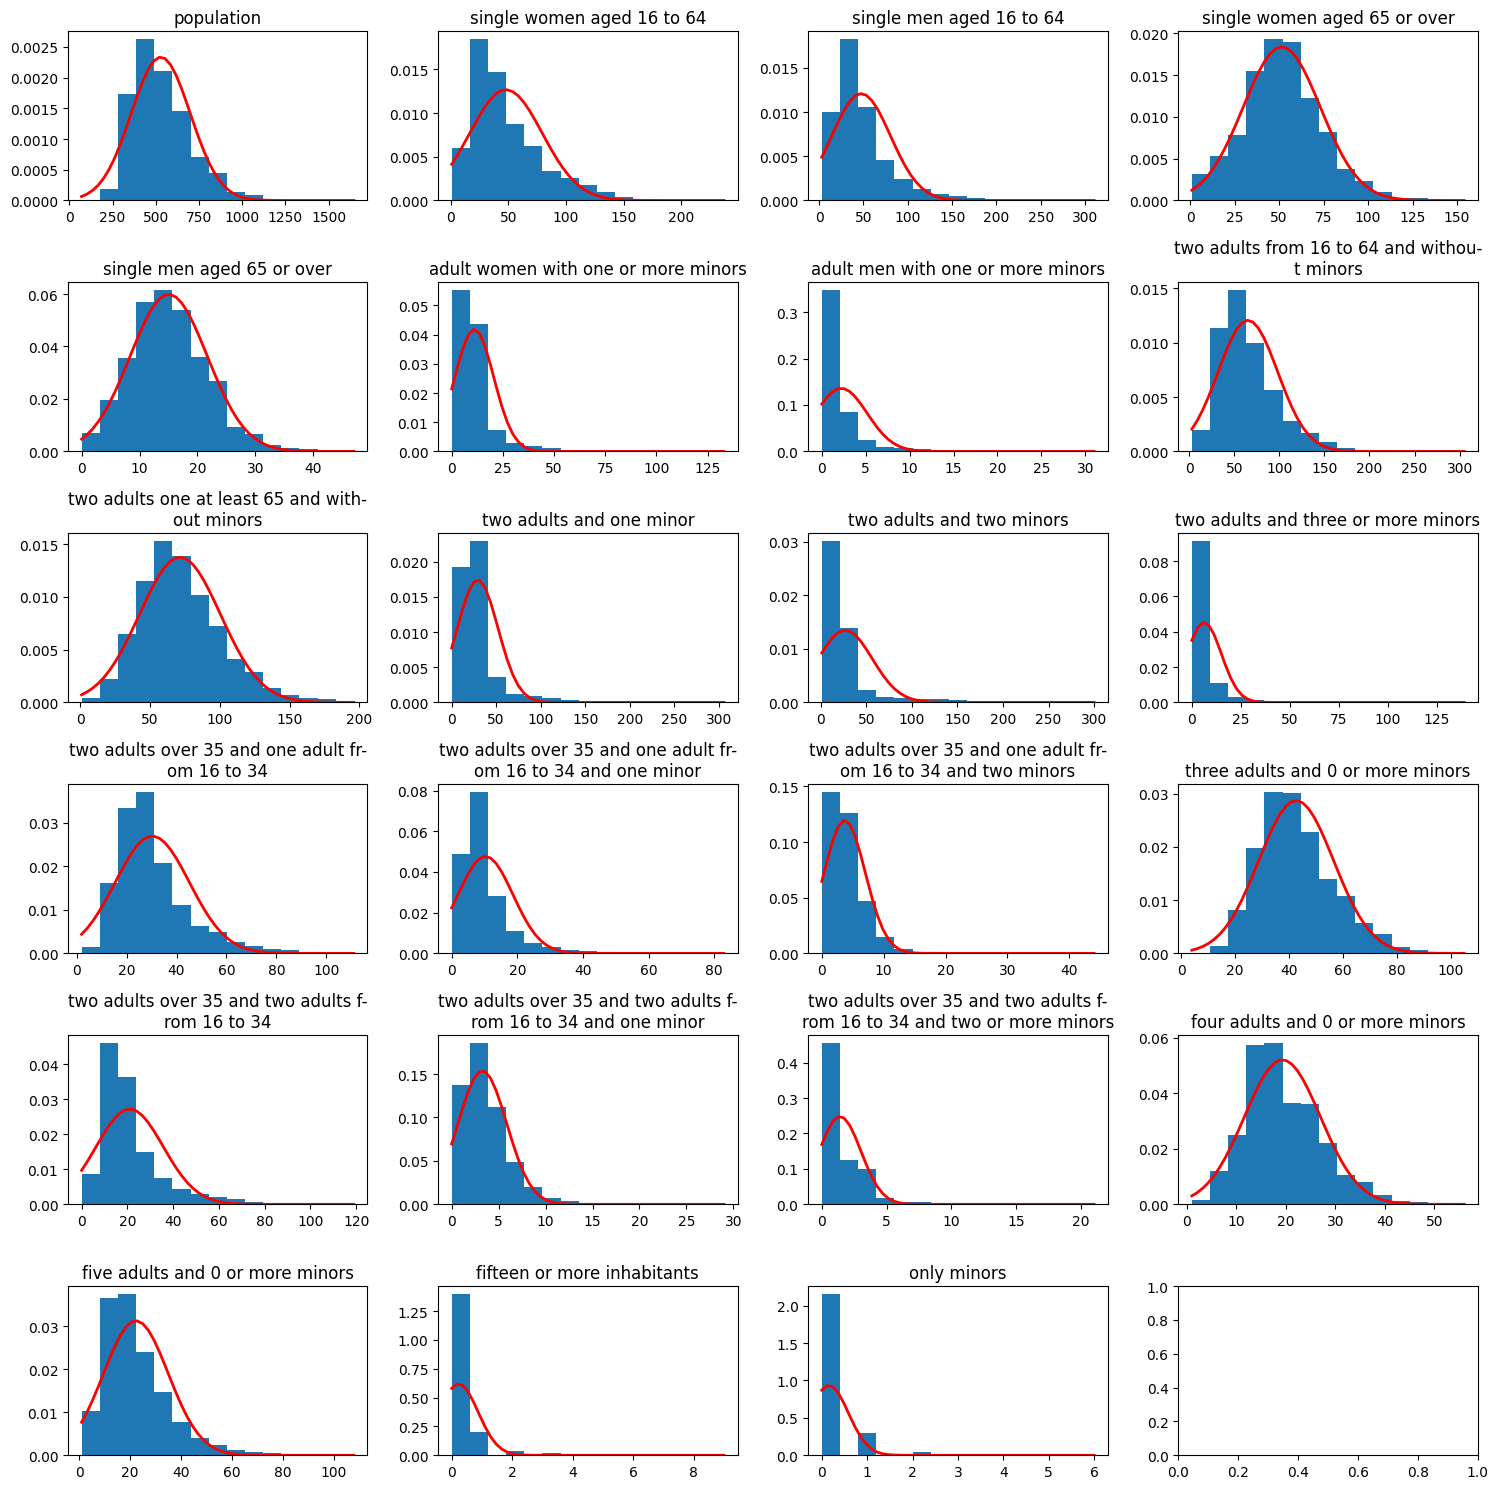

In [6]:
fig, axes = plt.subplots(6, 4, figsize=(15, 15))

# We skip section feature and year
for i, c in enumerate(df.columns[1:-1]):
    ax = axes.reshape(-1)[i]

    count, bins, ignore = ax.hist(df[c], 15, density=True)
    sigma = df[c].std()
    mu = df[c].mean()
    dbins = np.linspace(bins[0], bins[-1])
    ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (dbins - mu)**2
                                                           / (2 * sigma**2)), linewidth=2, color='red')
    c = c.replace('_', ' ')
    title = f'{c[:35]}-\n{c[35:]}' if len(c) > 35 else c
    t = ax.set_title(title)

plt.tight_layout()


Already in the above illustration we may have noticed some of these inconsistent values, but we will use the following table in conjunction to reach a conclusion.


In [5]:
df.describe()


,population,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors
count,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,...,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000
mean,528.872,48.079,47.395,51.515,15.039,11.033,2.225,65.191,71.452,29.175,...,10.300,3.702,42.690,21.031,3.267,1.410,19.295,22.344,0.230,0.160
std,170.889,31.490,33.014,21.728,6.665,9.535,2.935,33.039,29.016,22.895,...,8.368,3.337,13.907,14.643,2.595,1.605,7.676,12.737,0.645,0.427
min,71.000,1.000,3.000,1.000,0.000,0.000,0.000,3.000,1.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
25%,404.000,25.000,26.000,38.000,10.000,6.000,1.000,42.000,51.000,17.000,...,5.000,2.000,32.000,12.000,1.000,0.000,14.000,13.000,0.000,0.000
50%,498.000,40.000,39.000,50.000,14.000,9.000,1.000,59.000,68.000,23.000,...,8.000,3.000,41.000,17.000,3.000,1.000,18.000,19.000,0.000,0.000
75%,624.000,63.000,59.000,65.000,19.000,13.000,3.000,81.000,88.000,32.000,...,12.000,5.000,51.000,25.000,5.000,2.000,24.000,28.000,0.000,0.000
max,1646.000,237.000,310.000,154.000,47.000,133.000,31.000,305.000,196.000,306.000,...,83.000,44.000,105.000,119.000,29.000,21.000,56.000,108.000,9.000,6.000


* **population:** the information of this variable can be true
* **single_women_aged_16_to_64:** the information of this variable can be true
* **single_men_aged_16_to_64:** the information of this variable can be true
* **single_women_aged_65_or_over:** the information of this variable can be true
* **single_men_aged_65_or_over:** the information of this variable can be true
* **adult_women_with_one_or_more_minors:** the information of this variable can be true
* **adult_men_with_one_or_more_minors:** the information of this variable can be true
* **two_adults_from_16_to_64_and_without_minors:** the information of this variable can be true
* **two_adults_one_at_least_65_and_without_minors:** the information of this variable can be true
* **two_adults_and_one_minor:** the information of this variable can be true, although although it is a little rare that there is a district where there are not two adults with a minor
* **two_adults_and_two_minors:** the information of this variable can be true
* **two_adults_and_three_or_more_minors:** the information of this variable can be true
* **two_adults_over_35_and_one_adult_from_16_to_34:** the information of this variable can be true
* **two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor:** the information of this variable can be true
* **two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors:** the information of this variable can be true
* **three_adults_and_0_or_more_minors:** the information of this variable can be true
* **two_adults_over_35_and_two_adults_from_16_to_34:** the information of this variable can be true
* **two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor:** the information of this variable can be true
* **two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors:**
* **four_adults_and_0_or_more_minors:** the information of this variable can be true
* **five_adults_and_0_or_more_minors:** the information of this variable can be true
* **fifteen_or_more_inhabitants:** the information of this variable can be true
* **only_minors:** the information of this variable can be true

### Correlation matrix


Observing the correlation heatmap we can know those variable that are linearly related.

Text(0.5, 1.0, 'Correlation heatmap household data source')

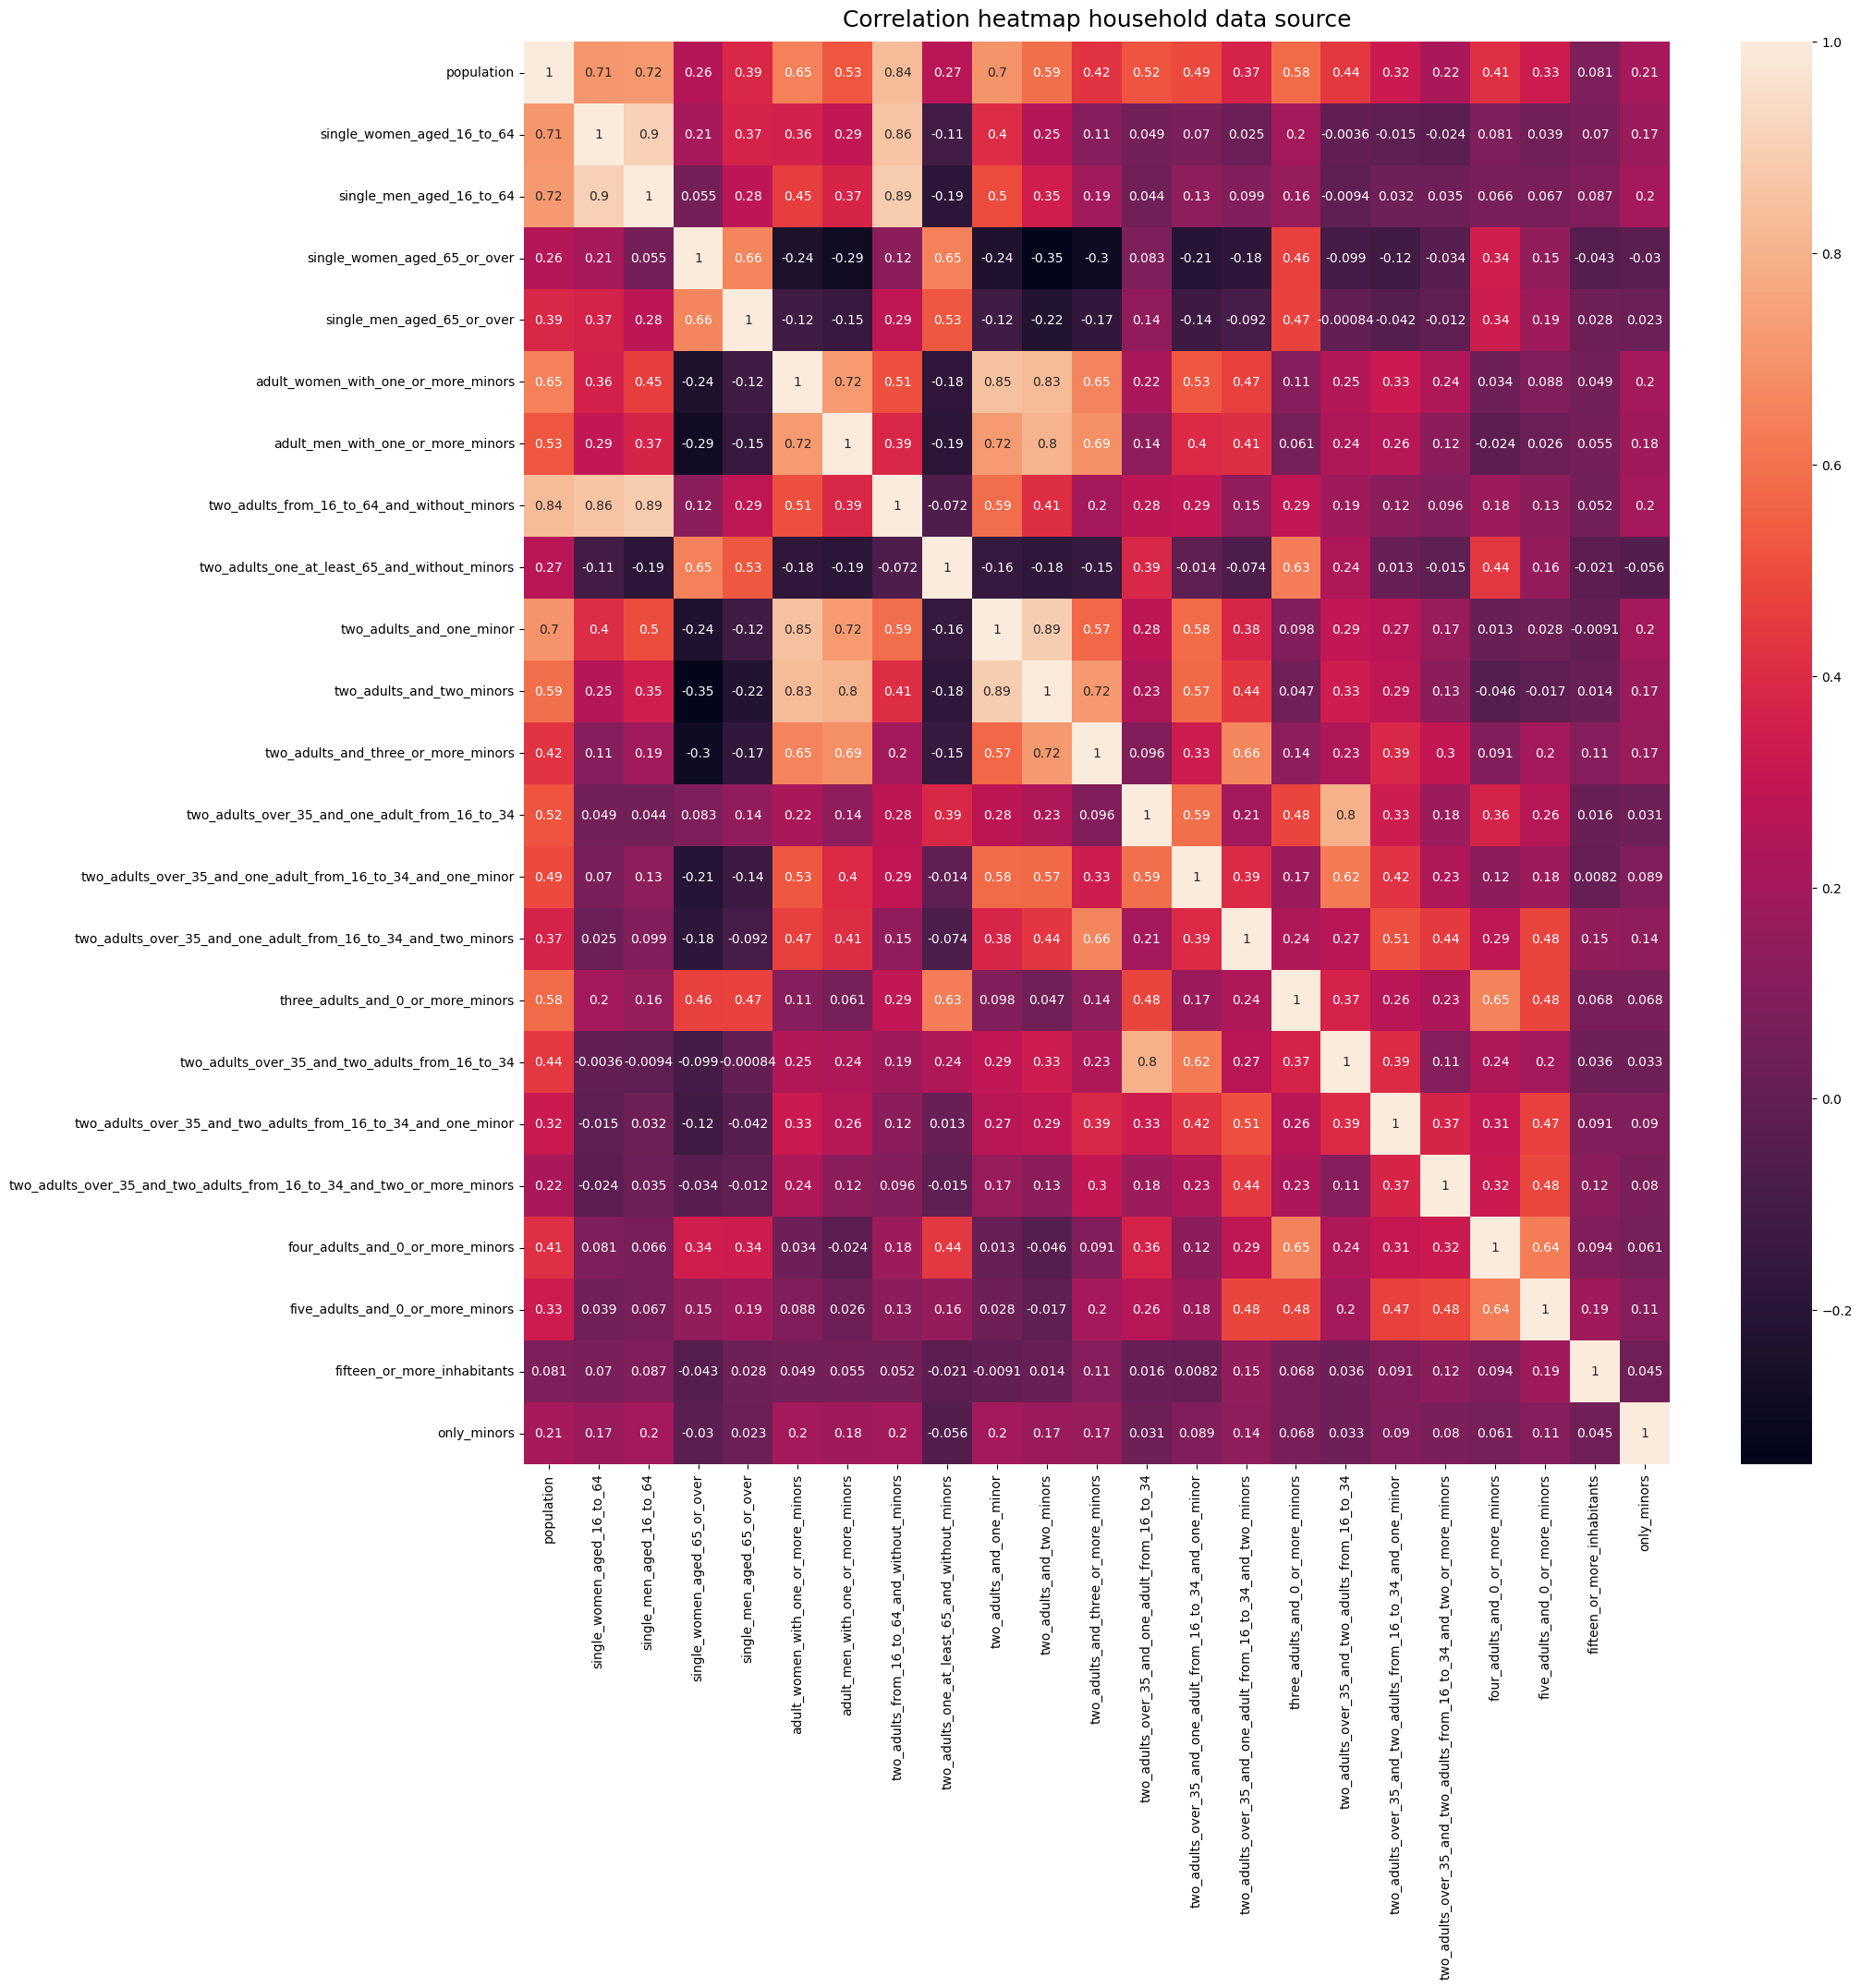

In [29]:
plt.figure(figsize=(20, 20))
ax=sns.heatmap(df.iloc[:,1:-1].corr(), annot=True)
ax.set_title('Correlation heatmap household data source', fontdict={'fontsize':18}, pad=12)


As there are many variables we decided to descent order by the absolute correlation, to see the higher correlation ones.

In [41]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

corrplot = get_correlations(df.iloc[:,1:-1])
corrplot[1:10] # show top 10 with highest correlation

two_adults_and_one_minor                        two_adults_and_two_minors                          0.891
single_men_aged_16_to_64                        two_adults_from_16_to_64_and_without_minors        0.887
single_women_aged_16_to_64                      two_adults_from_16_to_64_and_without_minors        0.862
adult_women_with_one_or_more_minors             two_adults_and_one_minor                           0.852
population                                      two_adults_from_16_to_64_and_without_minors        0.835
adult_women_with_one_or_more_minors             two_adults_and_two_minors                          0.831
adult_men_with_one_or_more_minors               two_adults_and_two_minors                          0.801
two_adults_over_35_and_one_adult_from_16_to_34  two_adults_over_35_and_two_adults_from_16_to_34    0.795
adult_women_with_one_or_more_minors             adult_men_with_one_or_more_minors                  0.723
dtype: float64